# **HEART DISEASE PREDICTION**

**Parameters:-**



1.  Age in years
2.  Sex (1 = Male; 0 = Female)
3.  Chest pain type (4 values)
4.  Resting blood pressure
3.  Serum cholestoral in mg/dl
4.  Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
5.  Resting electrocardiographic results (values 0,1,2)
6.  Maximum heart rate achieved
7.  Exercise induced angina (1 = yes; 0 = no)
8.  Oldpeak = ST depression induced by exercise relative to rest
9.  The slope of the peak exercise ST segment
10. Number of major vessels (0-3) colored by flourosopy
11. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

## About Dataset:-

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading Data
data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Exploratory Data Analysis (EDA)




In [ ]:
#Dataframe Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#Stats of dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking null values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# checking the distribution of Target Variable
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<Axes: >

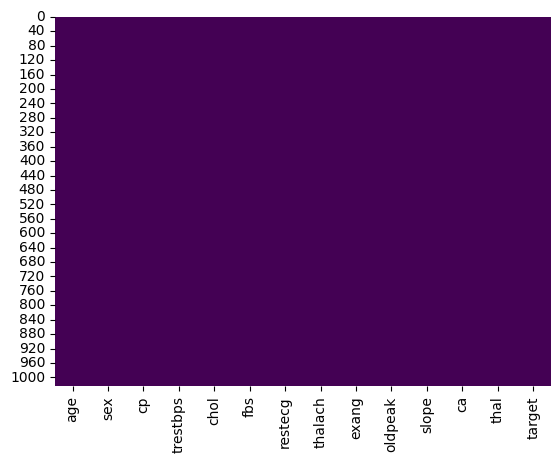

In [ ]:
# Visualizing the Missing Values With the help of heatmap
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

<Axes: >

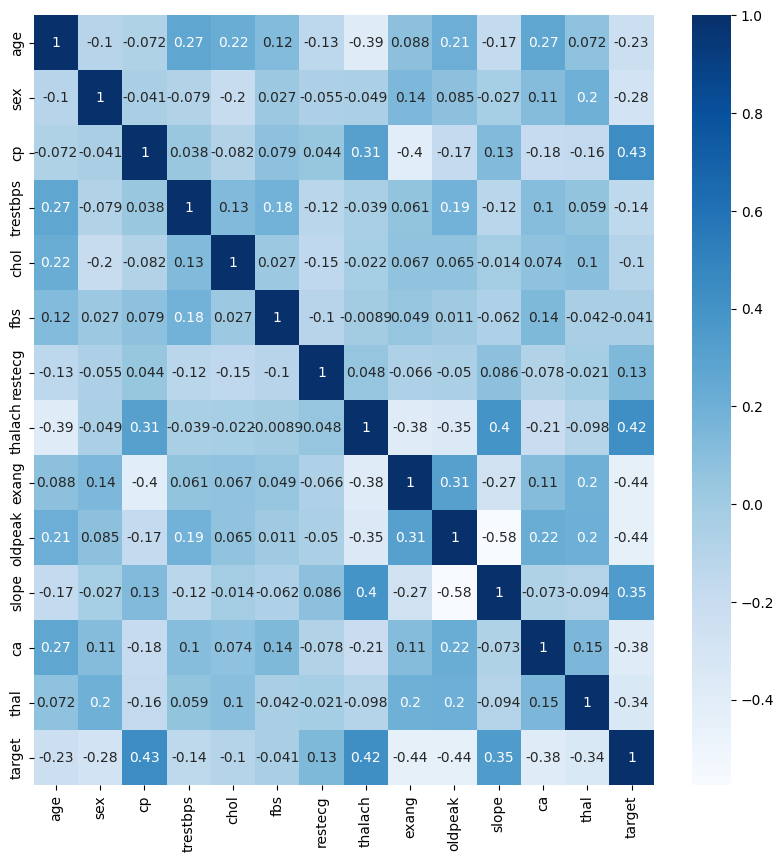

In [ ]:
# Correlation between different variables
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

# Positive Correlation with target column :-

**bWhen two variables have a positive correlation, it means that they tend to increase or decrease together.**

The slope of the peak exercise ST segment.
Maximum heart rate achieved.
Resting electrocardiographic results (values 0,1,2).
Chest Pain type

# Negative Correlation with target column :-

**Negative correlation occurs when one variable tends to increase as the other decreases, and vice versa.**

Age.
Sex.
Resting blood pressure.
Serum cholestoral.
Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
Exercise induced angina (1 = yes; 0 = no)
Oldpeak = ST depression induced by exercise relative to rest
Number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

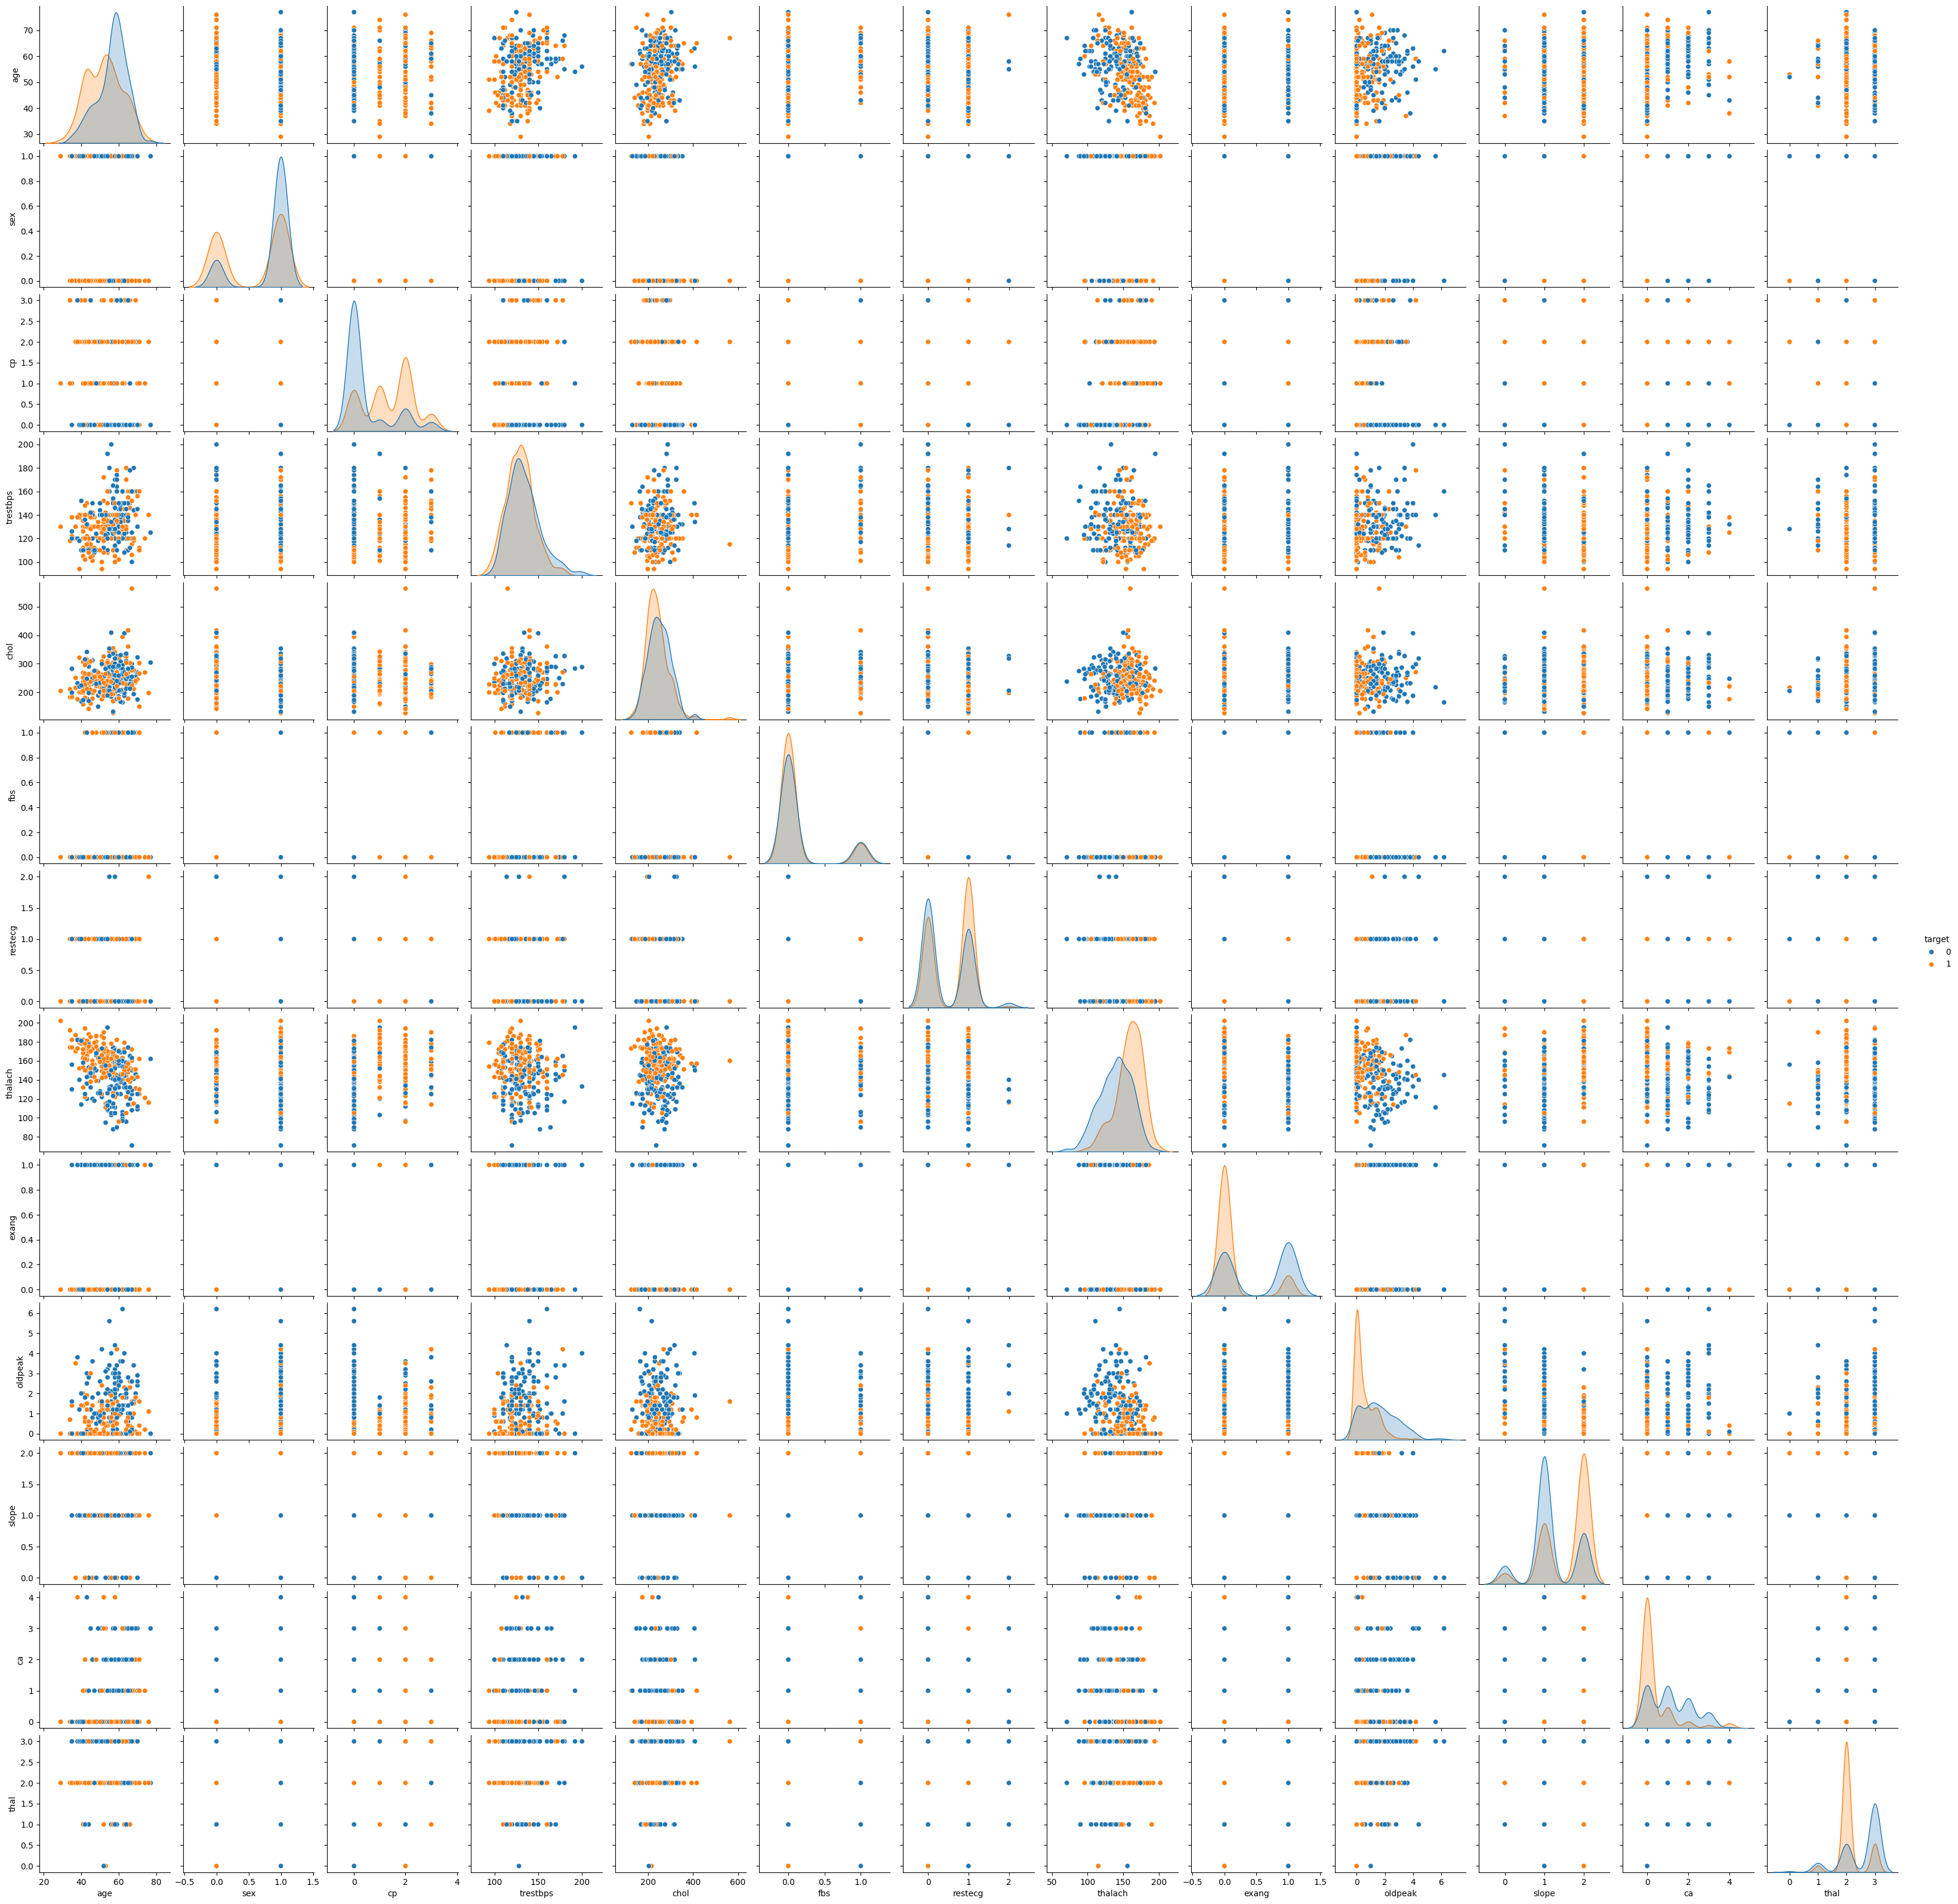

In [ ]:
# make a pairplot for complete dataframe
sns.pairplot(data,hue='target')
plt.show()

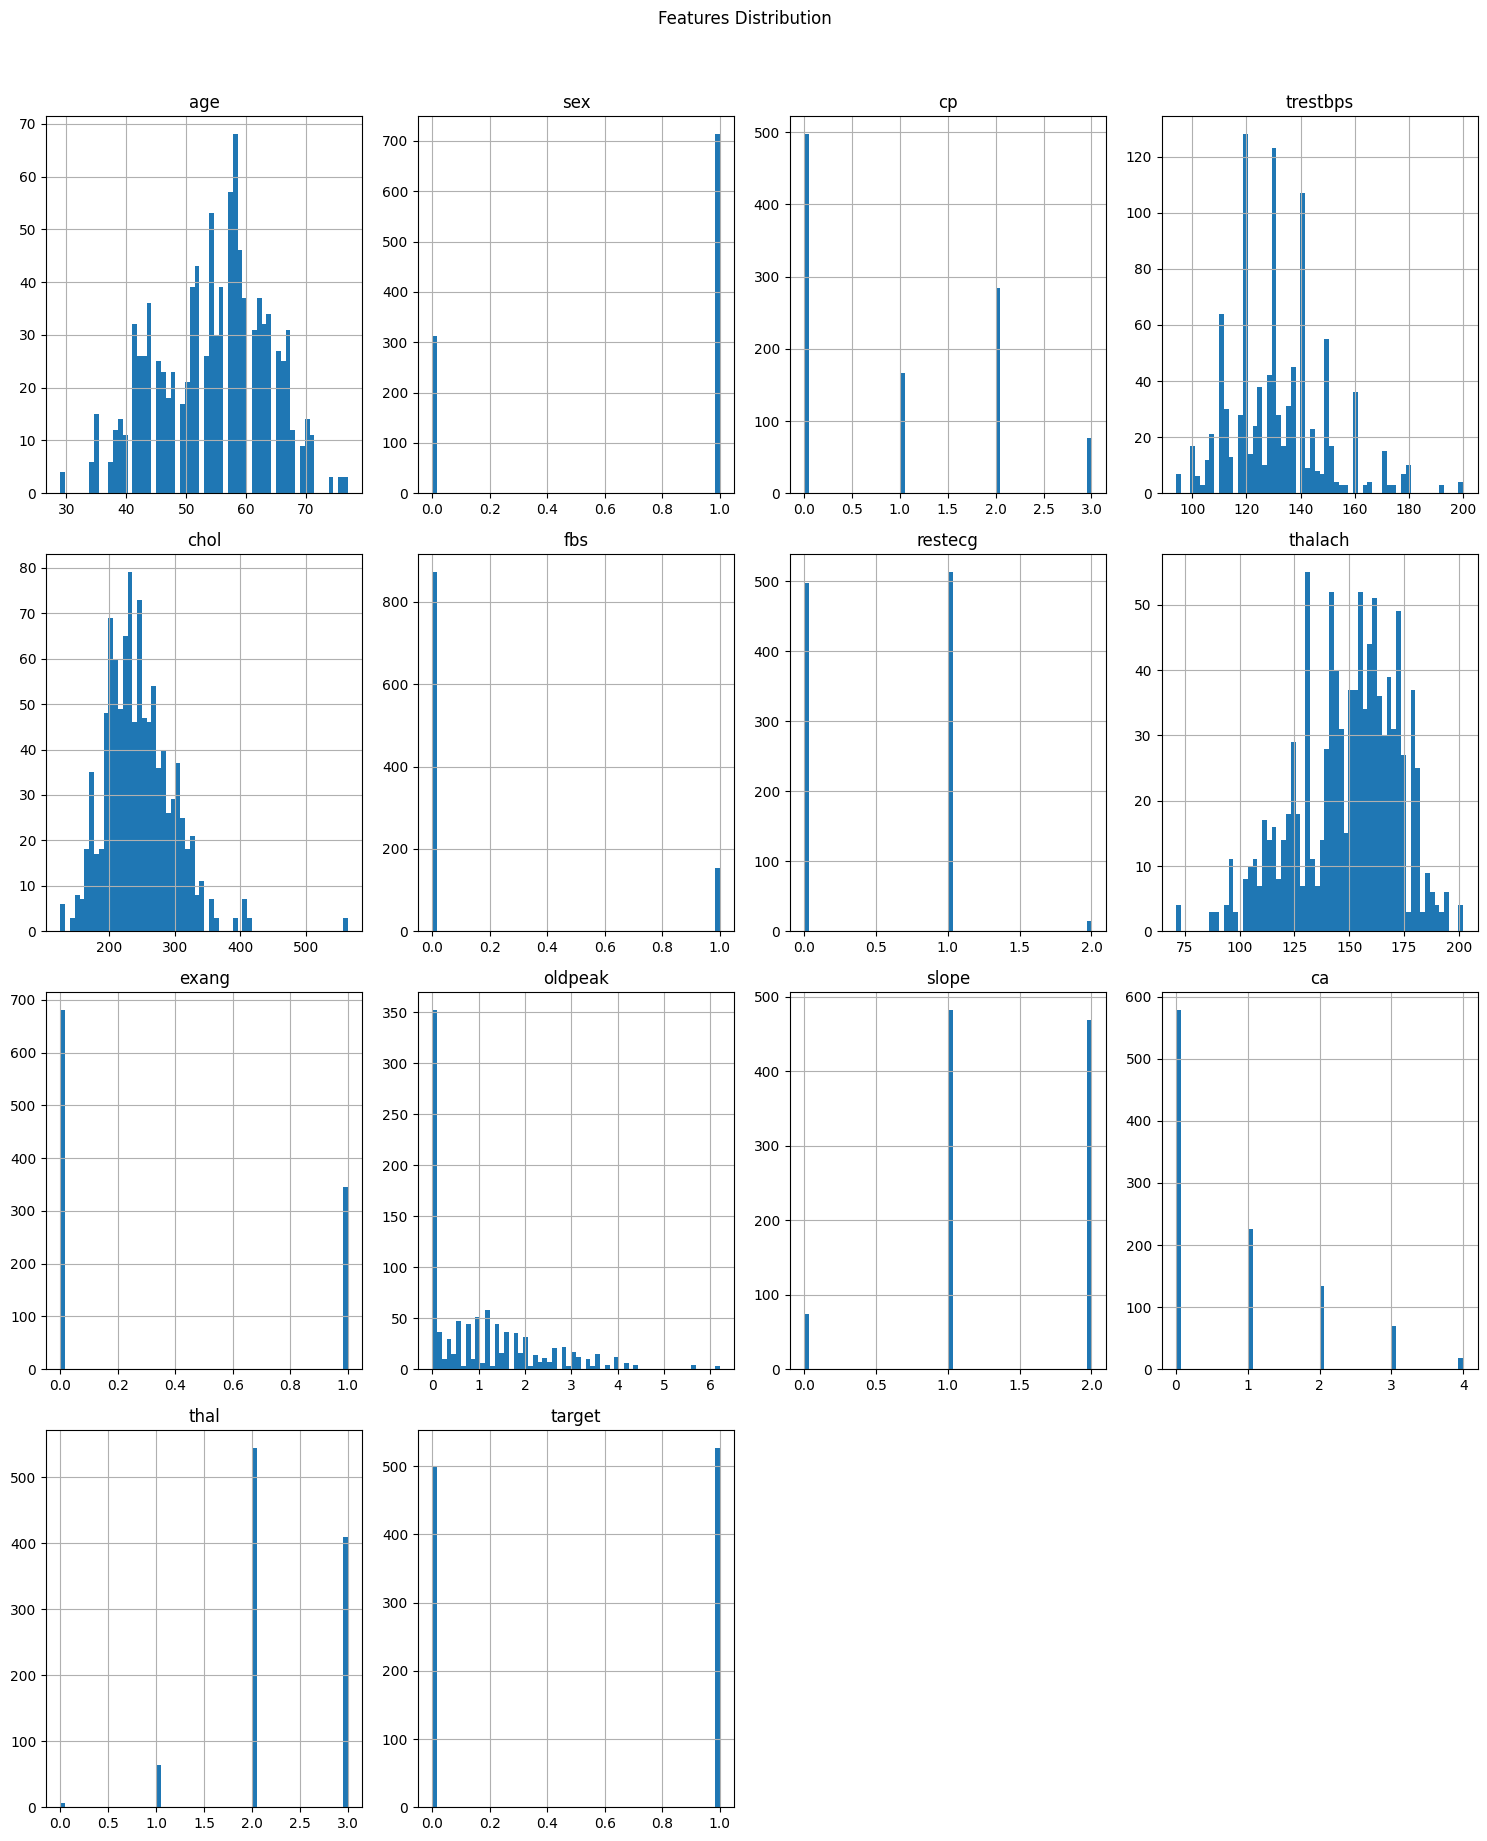

In [ ]:
# making a features distribution histogram plot
data.hist(figsize=(15,18),bins=60)

# adding title
plt.suptitle('Features Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

# adjust the plots gaps
plt.tight_layout()

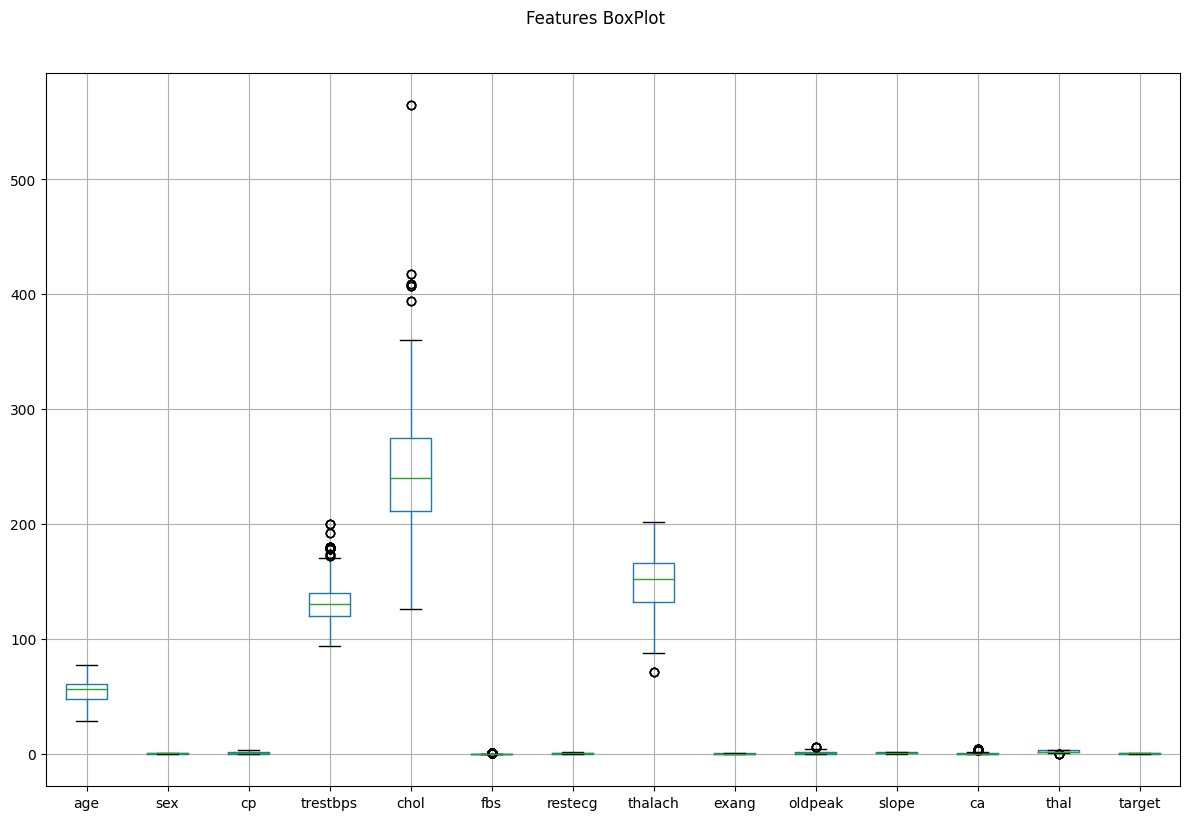

In [ ]:
# making boxplot for all features
data.boxplot(figsize=(12,8))

# adding title
plt.suptitle('Features BoxPlot',x=0.5,y=1.02,ha='center',fontsize='large')

# adjust the plots gaps
plt.tight_layout()


([<matplotlib.patches.Wedge at 0x7ae3546c1150>,
 [Text(-0.6342285709599224, 0.8987514226849017, 'Male'),
  Text(0.6342285709599218, -0.898751422684902, 'Female')],
 [Text(-0.3459428568872303, 0.49022804873721904, '70%'),
  Text(0.34594285688723003, -0.49022804873721926, '30%')])

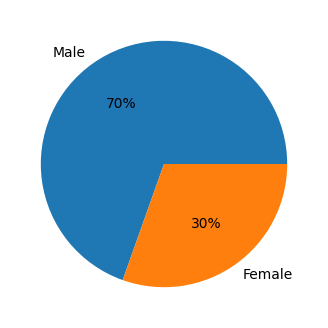

In [ ]:
# list for the sex column
gender = ['Male','Female']

# make an object which store value count of the elements in sex column
gender_data = pd.Series(data['sex']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(4,4))

# ploting pie chart
plt.pie(gender_data,labels=gender,autopct='%.0f%%')

<Axes: xlabel='sex', ylabel='count'>

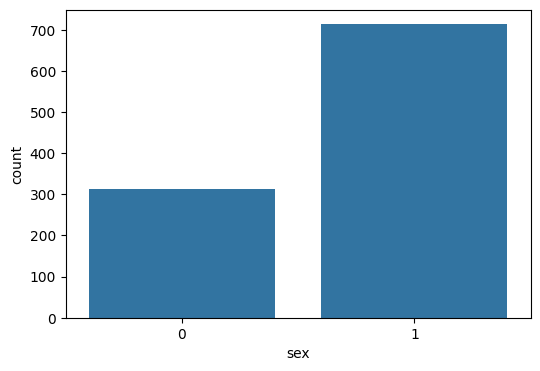

In [ ]:
# count plot for sex column
# 0=female and 1=male.
plt.figure(figsize=(6,4))
sns.countplot(data=data,x='sex')

<Axes: xlabel='cp', ylabel='count'>

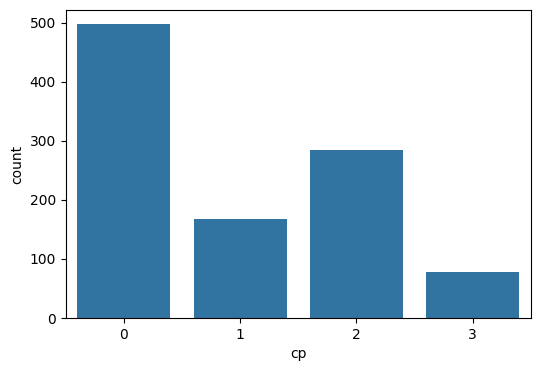

In [ ]:
# count plot for chest pain type column
plt.figure(figsize=(6,4))
sns.countplot(data=data,x='cp')

<Axes: xlabel='restecg', ylabel='count'>

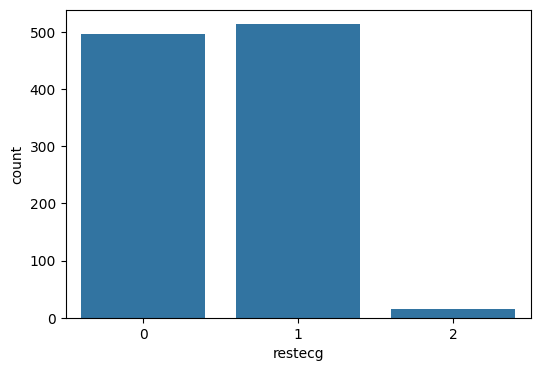

In [ ]:
# count plot for Resting electrocardiographic results column
plt.figure(figsize=(6,4))
sns.countplot(data=data,x='restecg')

<Axes: xlabel='slope', ylabel='count'>

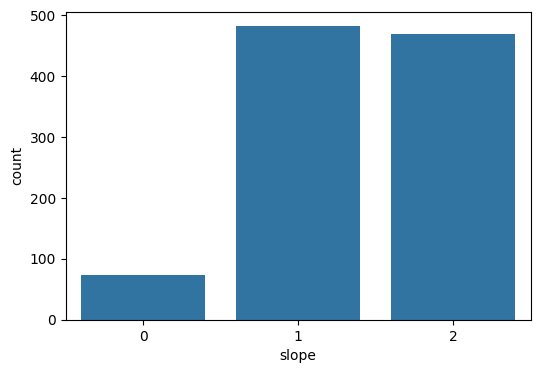

In [ ]:
# count plot for st slope column
plt.figure(figsize=(6,4))
sns.countplot(data=data,x='slope')

<Axes: xlabel='target', ylabel='count'>

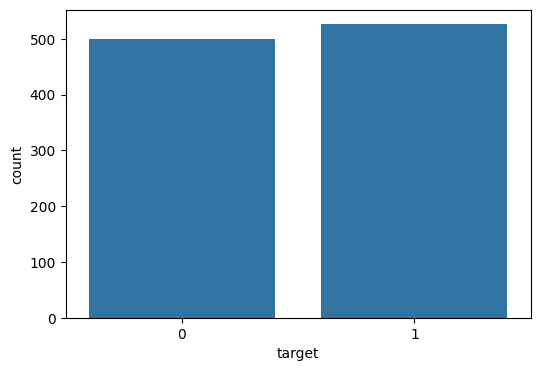

In [ ]:
# count plot for heart disease column
plt.figure(figsize=(6,4))
sns.countplot(data=data,x='target')

<ipython-input-22-41cd18591992>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['age'],kde=True)
<ipython-input-22-41cd18591992>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['trestbps'],kde=True)
<ipython-input-22-41cd18591992>:13: UserWarning: 

`distplot` is a deprecated fun

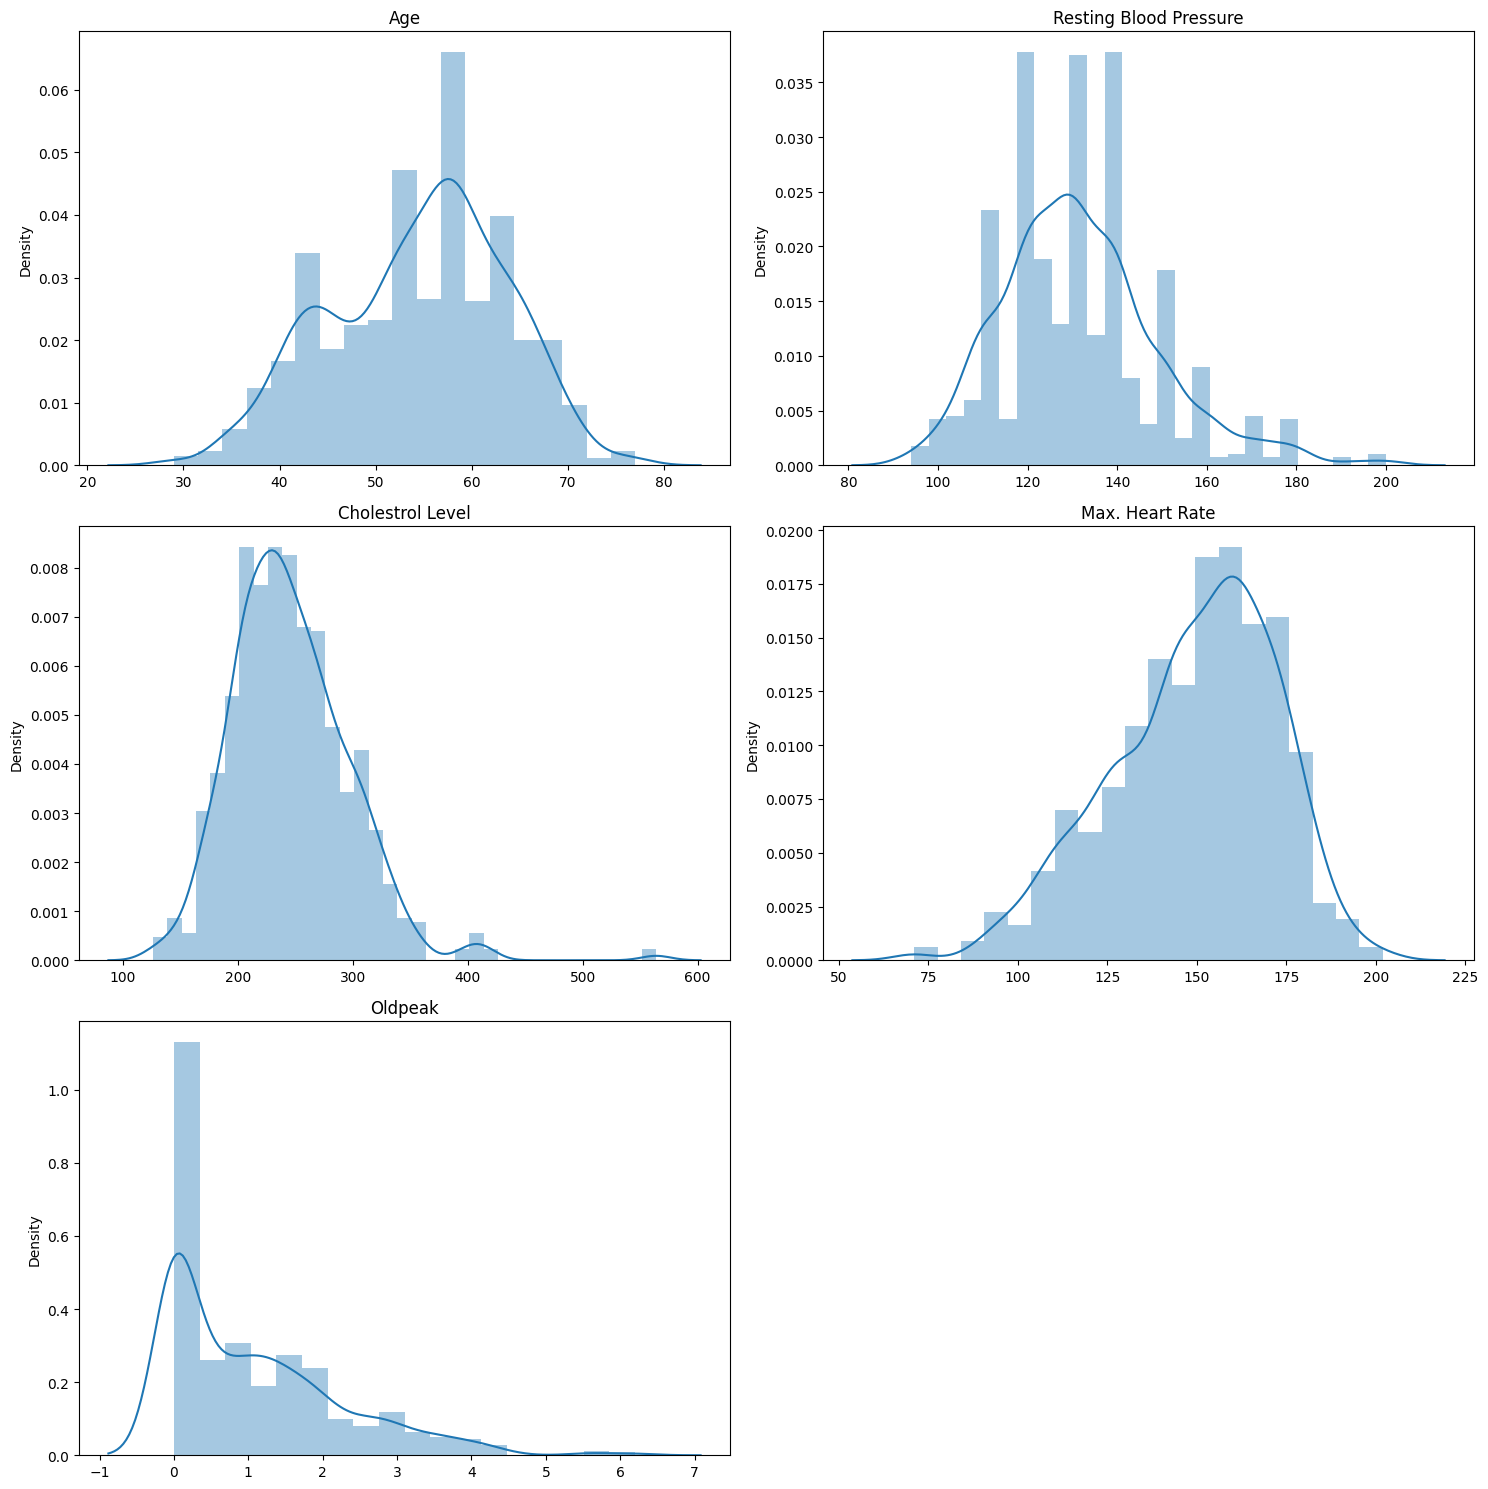

In [ ]:
# making histogram with kde to see the distribution of features
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.distplot(x=data['age'],kde=True)
plt.title('Age')

plt.subplot(3,2,2)
sns.distplot(x=data['trestbps'],kde=True)
plt.title('Resting Blood Pressure')

plt.subplot(3,2,3)
sns.distplot(x=data['chol'],kde=True)
plt.title('Cholestrol Level')

plt.subplot(3,2,4)
sns.distplot(x=data['thalach'],kde=True)
plt.title('Max. Heart Rate')

plt.subplot(3,2,5)
sns.distplot(x=data['oldpeak'],kde=True)
plt.title('Oldpeak')

plt.tight_layout()

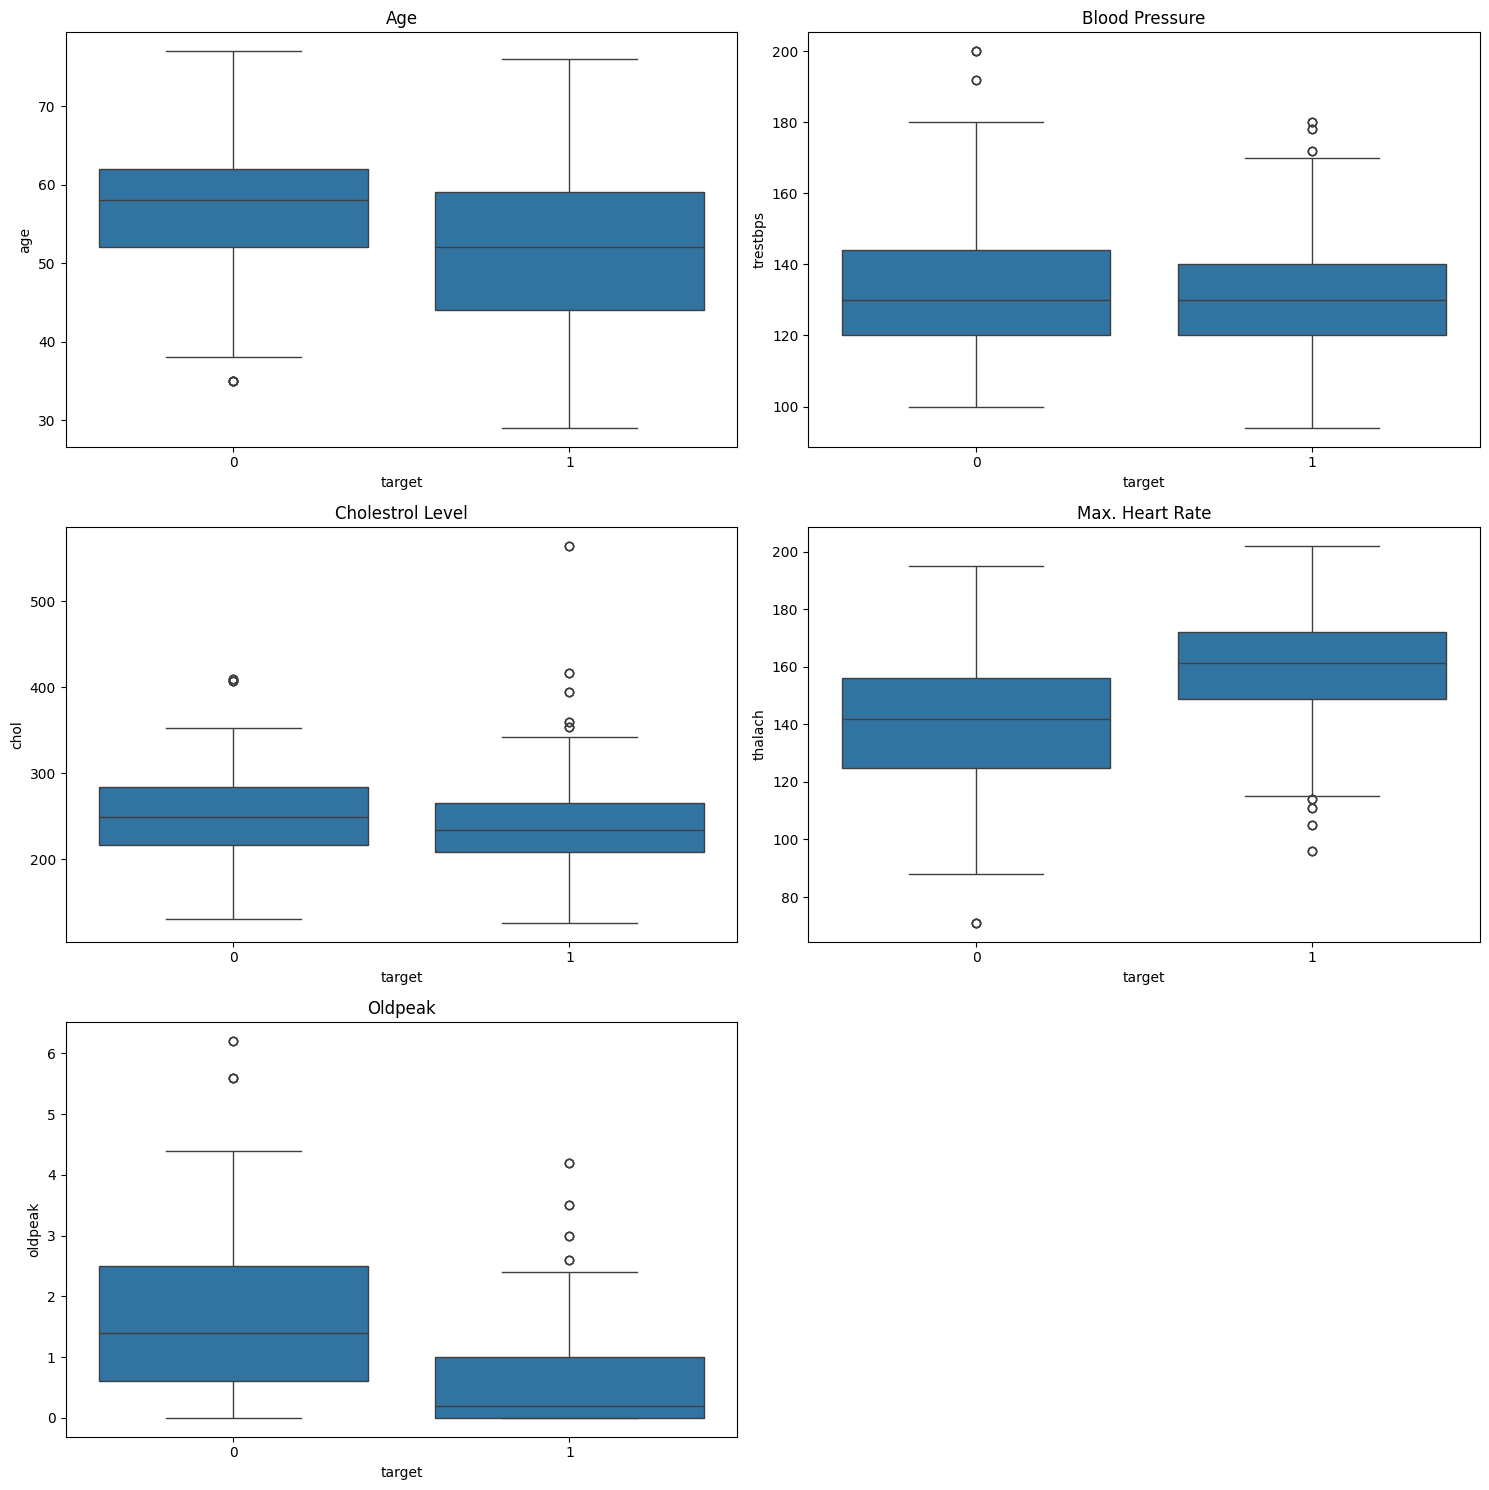

In [ ]:
# making boxplots to see the distribution
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.boxplot(x=data['target'],y=data['age'])
plt.title('Age')

plt.subplot(3,2,2)
sns.boxplot(x=data['target'],y=data['trestbps'])
plt.title('Blood Pressure')

plt.subplot(3,2,3)
sns.boxplot(x=data['target'],y=data['chol'])
plt.title('Cholestrol Level')

plt.subplot(3,2,4)
sns.boxplot(x=data['target'],y=data['thalach'])
plt.title('Max. Heart Rate')

plt.subplot(3,2,5)
sns.boxplot(x=data['target'],y=data['oldpeak'])
plt.title('Oldpeak')

plt.tight_layout()

<Figure size 1000x800 with 0 Axes>

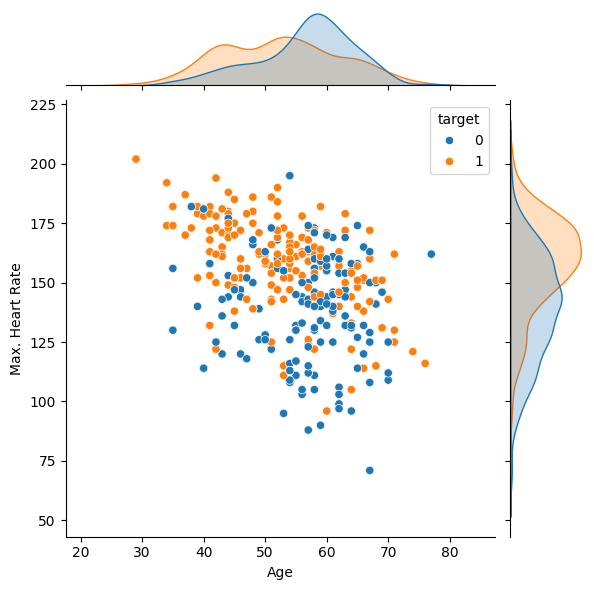

<Figure size 1000x800 with 0 Axes>

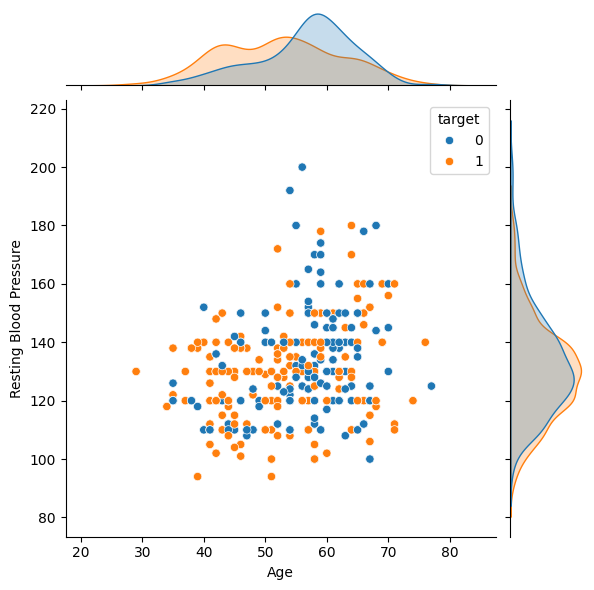

<Figure size 1000x800 with 0 Axes>

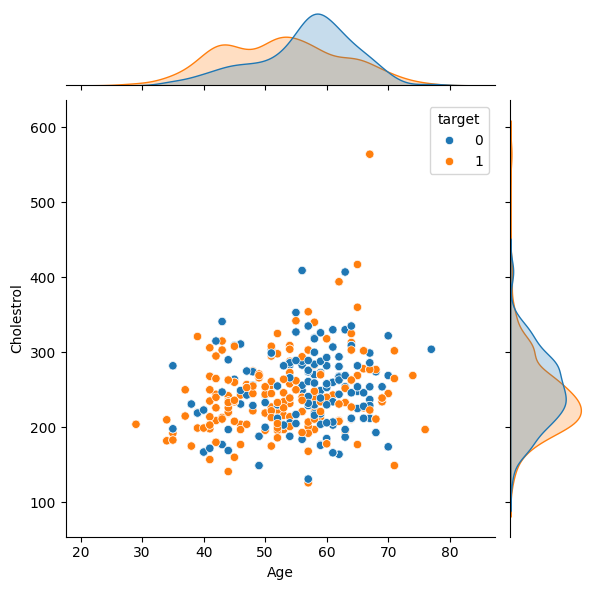

In [ ]:
# jointplot for 'Age' vs 'Max. Heart Rate'
plt.figure(figsize=(10,8))
sns.jointplot(data=data,x='age',y='thalach',hue='target')
plt.xlabel("Age")
plt.ylabel('Max. Heart Rate')
plt.show()

# jointplot for 'Age' vs 'Blood Pressure'
plt.figure(figsize=(10,8))
sns.jointplot(data=data,x='age',y='trestbps',hue='target')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

# jointplot for 'Age' vs 'Cholesterol'
plt.figure(figsize=(10,8))
sns.jointplot(data=data,x='age',y='chol',hue='target')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.show()

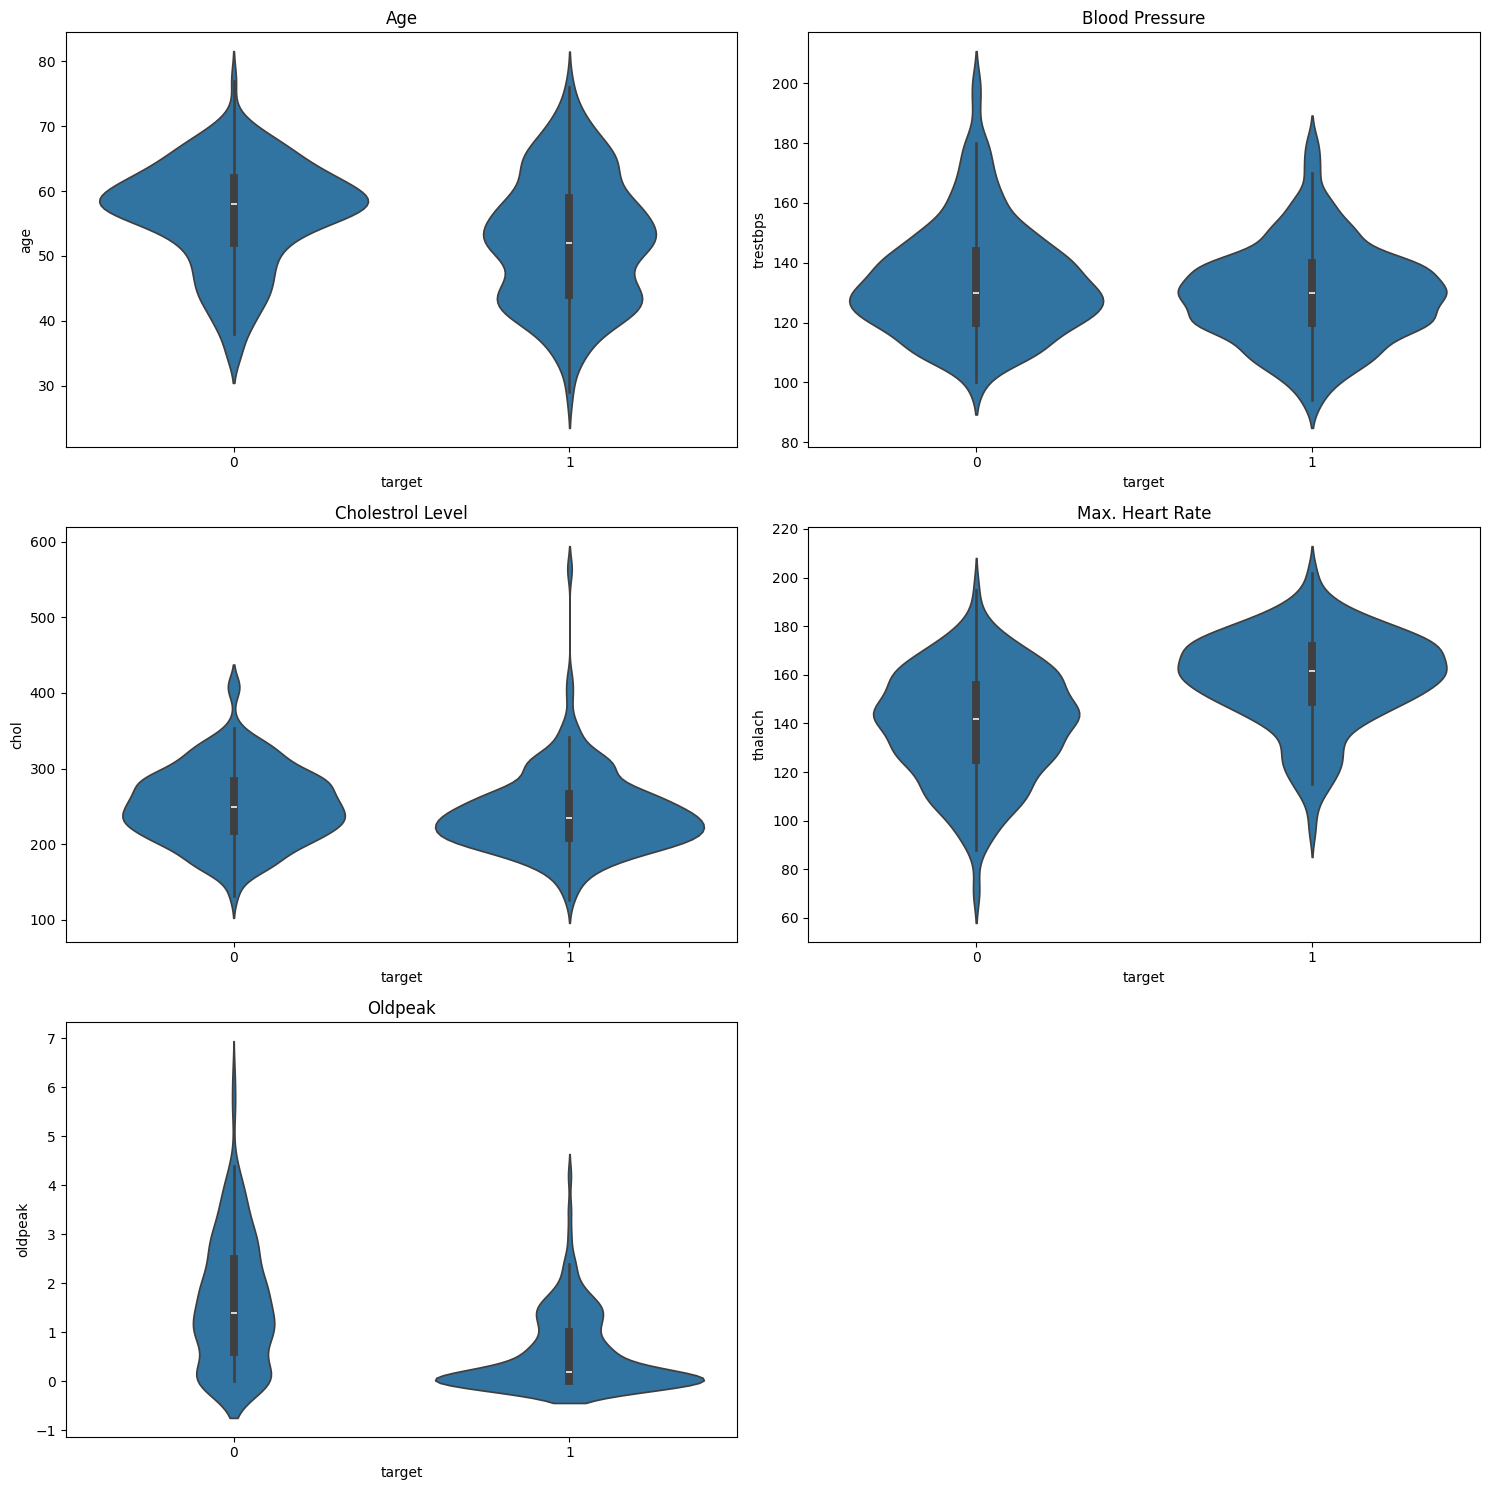

In [ ]:
# making violinplots for features ('Heart Disease Result' vs 'All numeric features')
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.violinplot(x=data['target'],y=data['age'])
plt.title('Age')

plt.subplot(3,2,2)
sns.violinplot(x=data['target'],y=data['trestbps'])
plt.title('Blood Pressure')

plt.subplot(3,2,3)
sns.violinplot(x=data['target'],y=data['chol'])
plt.title('Cholestrol Level')

plt.subplot(3,2,4)
sns.violinplot(x=data['target'],y=data['thalach'])
plt.title('Max. Heart Rate')

plt.subplot(3,2,5)
sns.violinplot(x=data['target'],y=data['oldpeak'])
plt.title('Oldpeak')

plt.tight_layout()

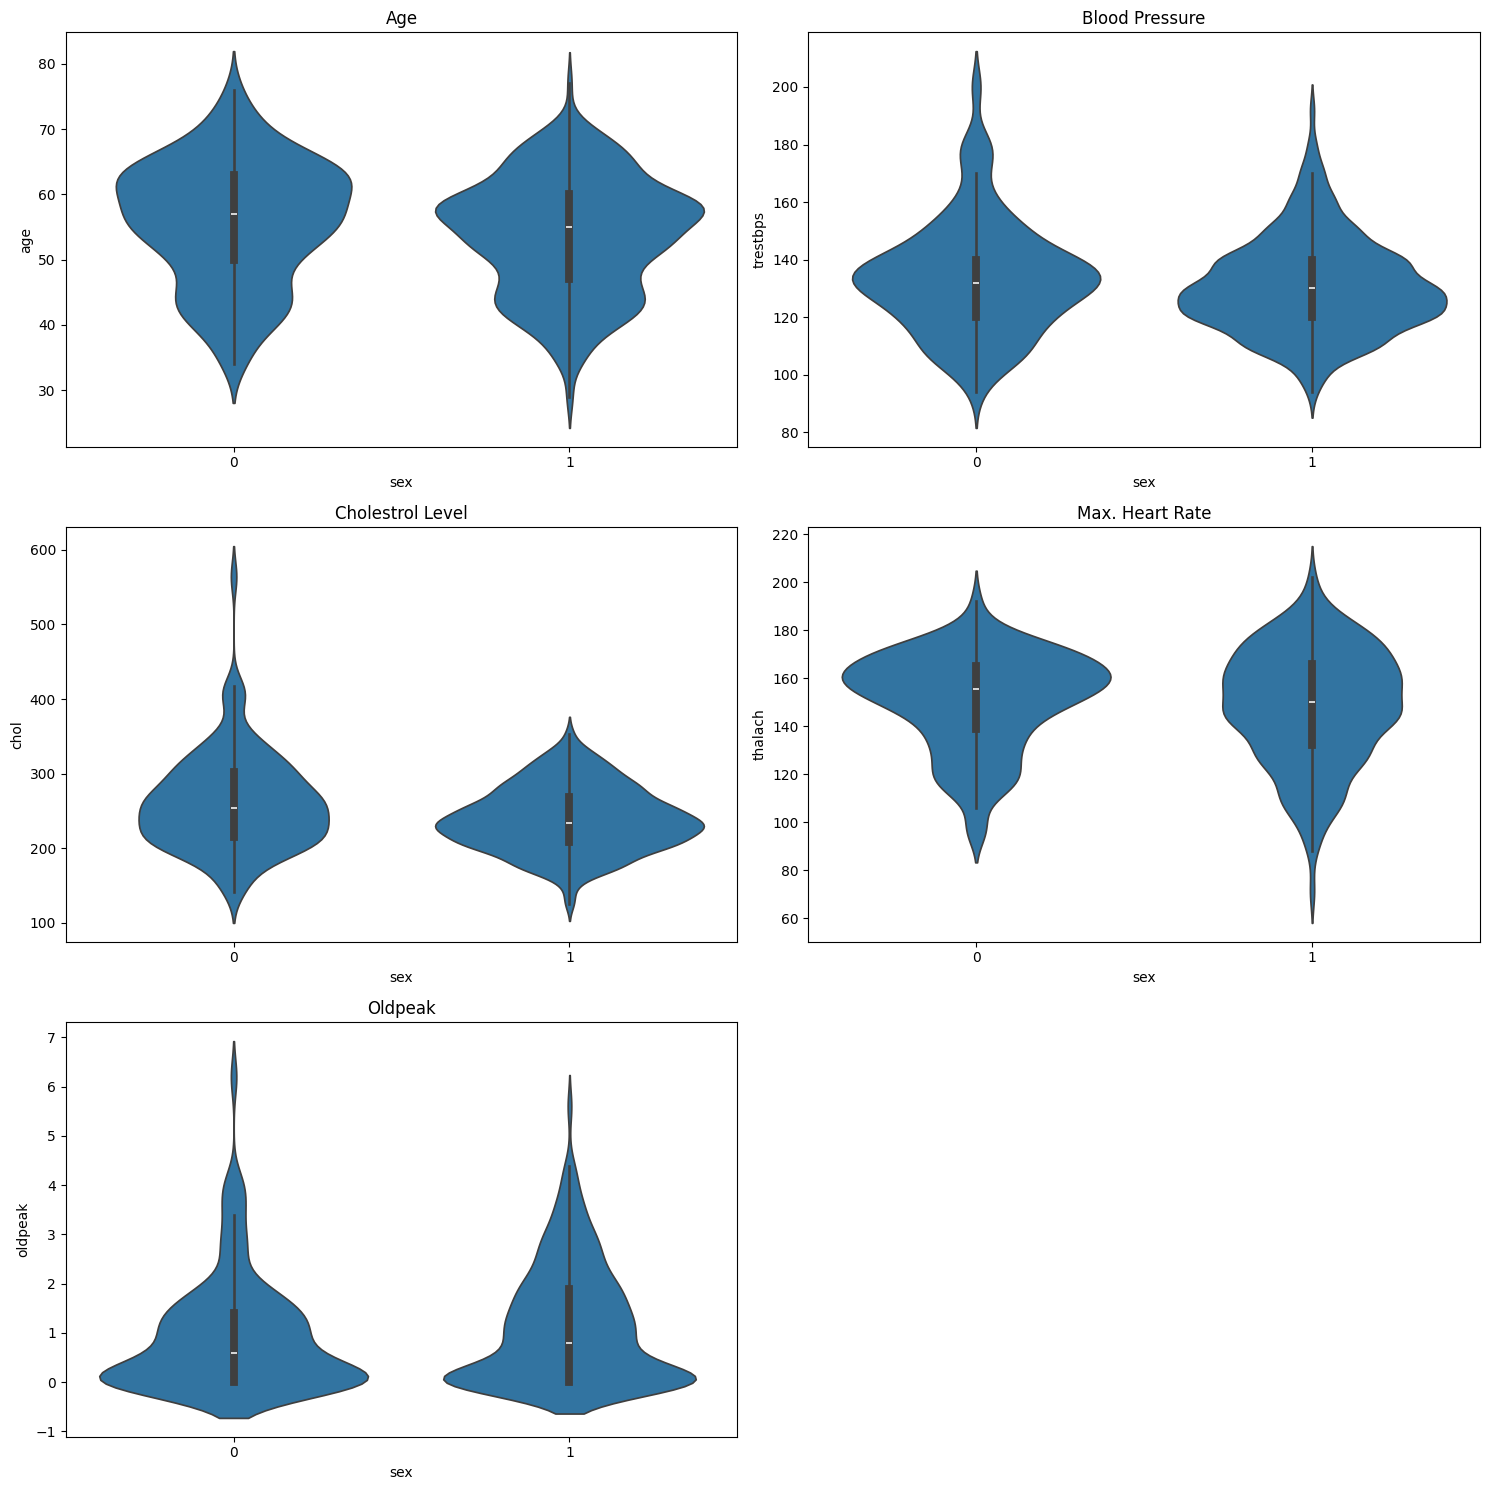

In [ ]:
# making violinplots for features ('Sex' vs 'All numeric features')
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.violinplot(x=data['sex'],y=data['age'])
plt.title('Age')

plt.subplot(3,2,2)
sns.violinplot(x=data['sex'],y=data['trestbps'])
plt.title('Blood Pressure')

plt.subplot(3,2,3)
sns.violinplot(x=data['sex'],y=data['chol'])
plt.title('Cholestrol Level')

plt.subplot(3,2,4)
sns.violinplot(x=data['sex'],y=data['thalach'])
plt.title('Max. Heart Rate')

plt.subplot(3,2,5)
sns.violinplot(x=data['sex'],y=data['oldpeak'])
plt.title('Oldpeak')

plt.tight_layout()

# ENSEMBLE TECHNIQUE

Importing ML Liabraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x = data.drop('target',axis="columns")
y = data.target

## ADAPTIVE BOOSTING ENSEMBLE TECHNIQUE![Bagging.png](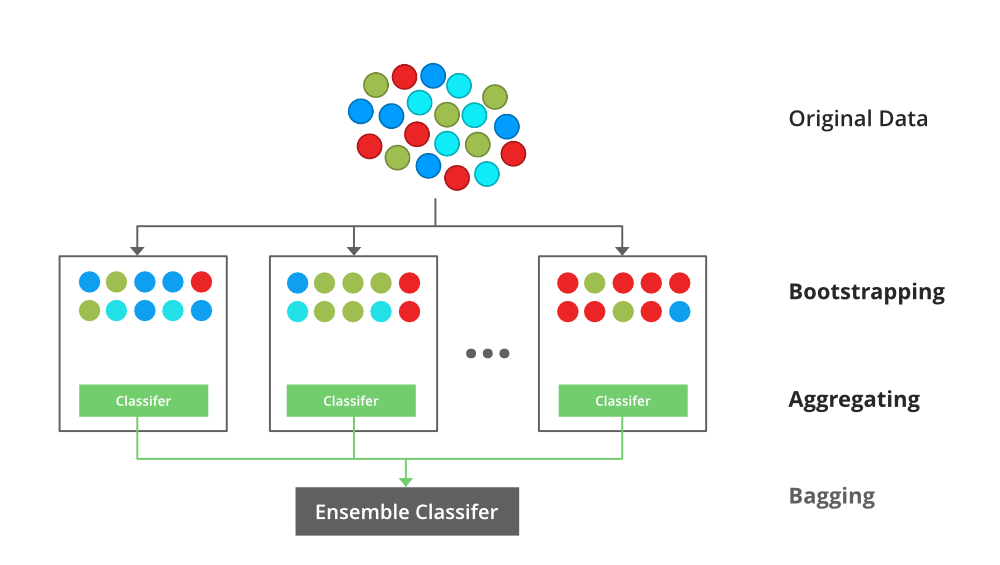![stacking.png](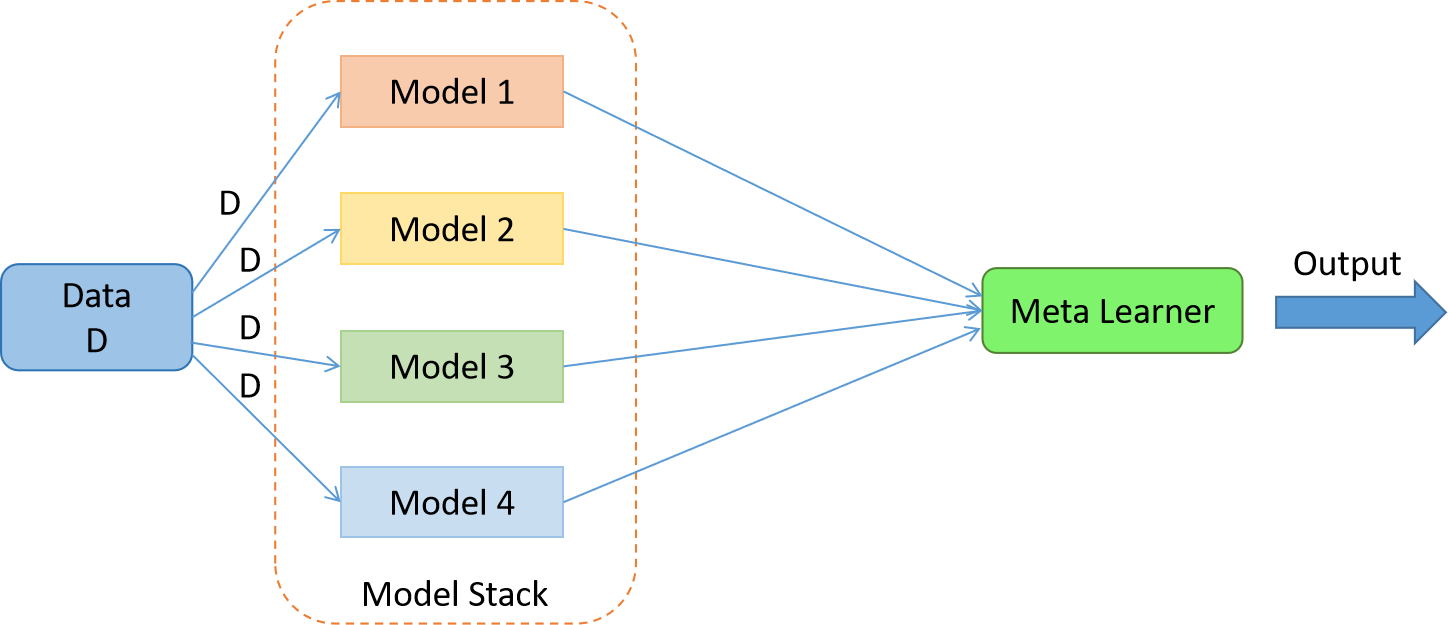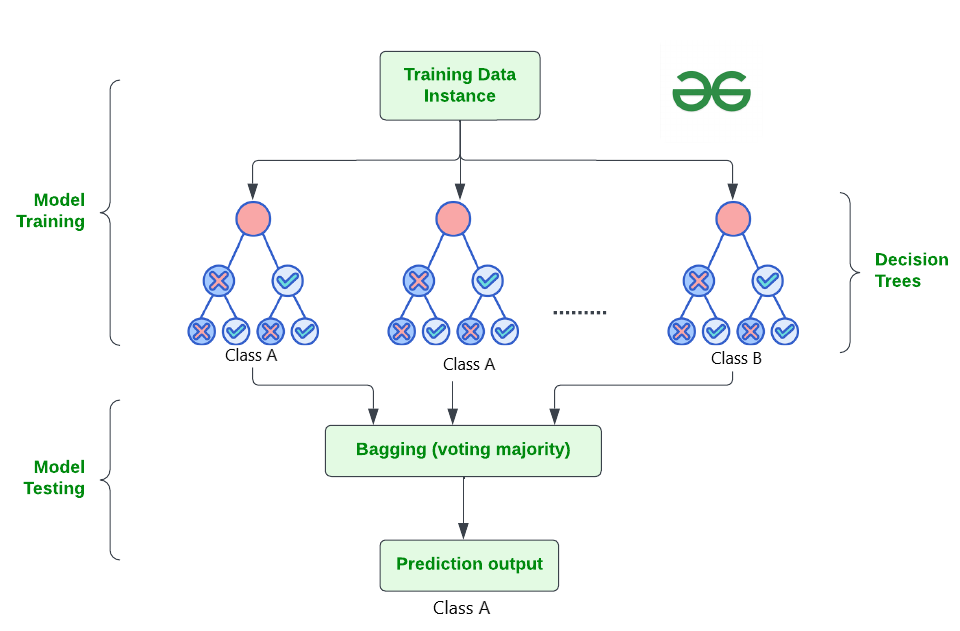))

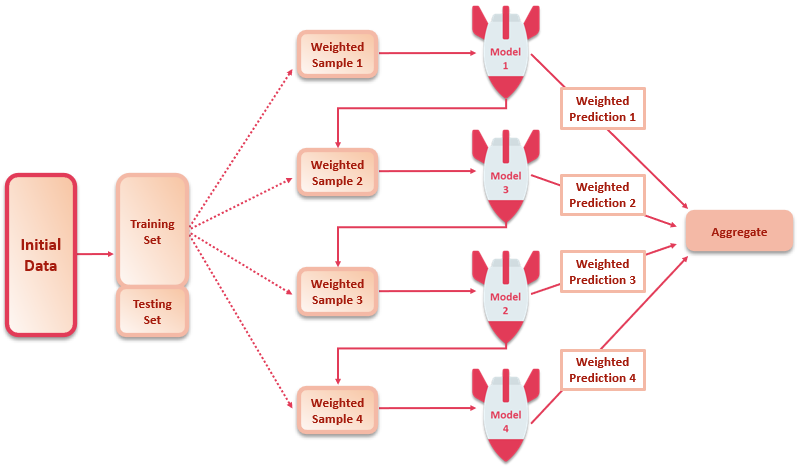

In [ ]:
#Split the dataset into 70% training set and 30% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=23)

In [ ]:
#Train a Decision tree classifier
dtree = DecisionTreeClassifier(max_depth=1, random_state=23)
dtree.fit(x_train,y_train)
dt_pred = dtree.predict(x_test)

dt_acc = round(accuracy_score(y_test,dt_pred),3)
print(f"Decision Tree Classifier Accuracy Score: ", dt_acc)

Decision Tree Classifier Accuracy Score:  0.76


In [ ]:
#AdaBoost Model using Decision Tree Classifier
ada = AdaBoostClassifier(n_estimators=50,learning_rate=0.6)
ada.fit(x_train,y_train)
ada_pred = ada.predict(x_test)

ada_acc = round(accuracy_score(y_test,ada_pred),3)
print(f"Decision Tree AdaBoost Model Accuracy Score: ", ada_acc)

Decision Tree AdaBoost Model Accuracy Score:  0.883


<BarContainer object of 2 artists>

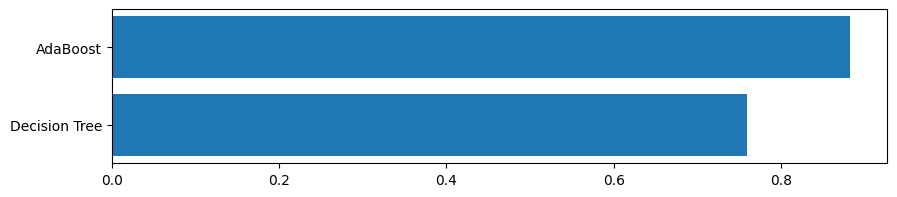

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Visualize the Accuracy Scores
plt.figure(figsize=(10,2))
plt.barh(np.arange(2),[dt_acc,ada_acc],
         tick_label=['Decision Tree','AdaBoost'])


In [ ]:
# Create Logistic Regression classifier
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)
logistic_pred = logistic_reg.predict(x_test)

logistic_acc = round(accuracy_score(y_test, logistic_pred), 3)
print("Logistic Regression Classifier Accuracy Score:", logistic_acc)

Logistic Regression Classifier Accuracy Score: 0.844


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create AdaBoost classifier with Logistic Regression as base estimator
ada_logistic = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=50, learning_rate=0.6)
ada_logistic.fit(x_train, y_train)
ada_logistic_pred = ada_logistic.predict(x_test)

ada_logistic_acc = round(accuracy_score(y_test, ada_logistic_pred), 3)
print("Logistic Regression AdaBoost Model Accuracy Score:", ada_logistic_acc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

Logistic Regression AdaBoost Model Accuracy Score: 0.857


<BarContainer object of 2 artists>

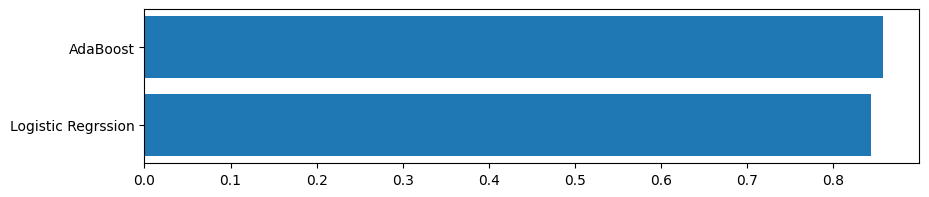

In [ ]:
#Visualize the Accuracy Scores
plt.figure(figsize=(10,2))
plt.barh(np.arange(2),[logistic_acc,ada_logistic_acc],
         tick_label=['Logistic Regrssion','AdaBoost'])

In [ ]:
input_data = (70,1,3,145,233,1,0,150,0,2.3,1,0,1)

# Fit the bagging classifier
ada_logistic.fit(x, y)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

print(input_data_reshaped)

prediction = ada_logistic.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

[[ 70.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   1.    0.
    1. ]]
[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


## BAGGING Ensemble Technique

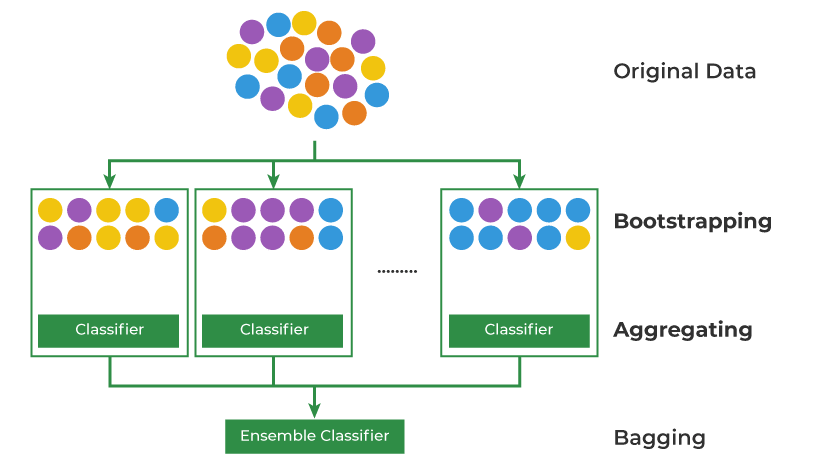

 It is a homogeneous weak learners’ model that learns from each other independently in parallel and combines them for determining the model average.


*   Step 1: Multiple subsets are created from the original data set with equal tuples, selecting observations with replacement.
*   Step 2: A base model is created on each of these subsets.

*   Step 3: Each model is learned in parallel with each training set and independent of each other.
*   Step 4: The final predictions are determined by combining the predictions from all the models.





In [ ]:
# spliting data into X and y variables

# data or dependent variable
x = data.drop('target',axis='columns')

# target or independent variable
y = data['target']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled[:3]

array([[-0.26843658,  0.66150409, -0.91575542, -0.37763552, -0.65933209,
        -0.41887792,  0.89125488,  0.82132052, -0.71228712, -0.06088839,
         0.99543334,  1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542,  0.4791073 , -0.83386117,
         2.38733039, -1.00404855,  0.2559679 ,  1.40392824,  1.72713707,
        -2.24367514, -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542,  0.76468824, -1.39623266,
        -0.41887792,  0.89125488, -1.04869198,  1.40392824,  1.30141672,
        -2.24367514, -0.73197147,  1.08985168]])

In [ ]:
# spliting data into train and test variables
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,stratify=y,random_state=10)

In [ ]:
print(X_test.shape)
print(X_train.shape)

(257, 13)
(768, 13)


In [ ]:
scores =  cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
scores

array([1., 1., 1., 1., 1.])

In [ ]:
bag_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(),
                  n_estimators =100,
                  max_samples=0.8,
                  oob_score = True,
                  random_state =0 )
bag_model.fit(X_train,y_train)
bag_model.oob_score_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9947916666666666

In [ ]:
bag_model.score(X_test , y_test)

0.9844357976653697

In [ ]:
bag_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(),
                  n_estimators =100,
                  max_samples=0.8,
                  oob_score = True,
                  random_state =0 )
score=cross_val_score(bag_model,x,y,cv=5)
score.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9951219512195122

In [ ]:
input_data = (70,1,3,145,233,1,0,150,0,2.3,1,0,1)

# Fit the bagging classifier
bag_model.fit(x, y)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

print(input_data_reshaped)

prediction = bag_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[[ 70.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   1.    0.
    1. ]]
[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


## STACKING ENSEMBLE TECHNIQUE

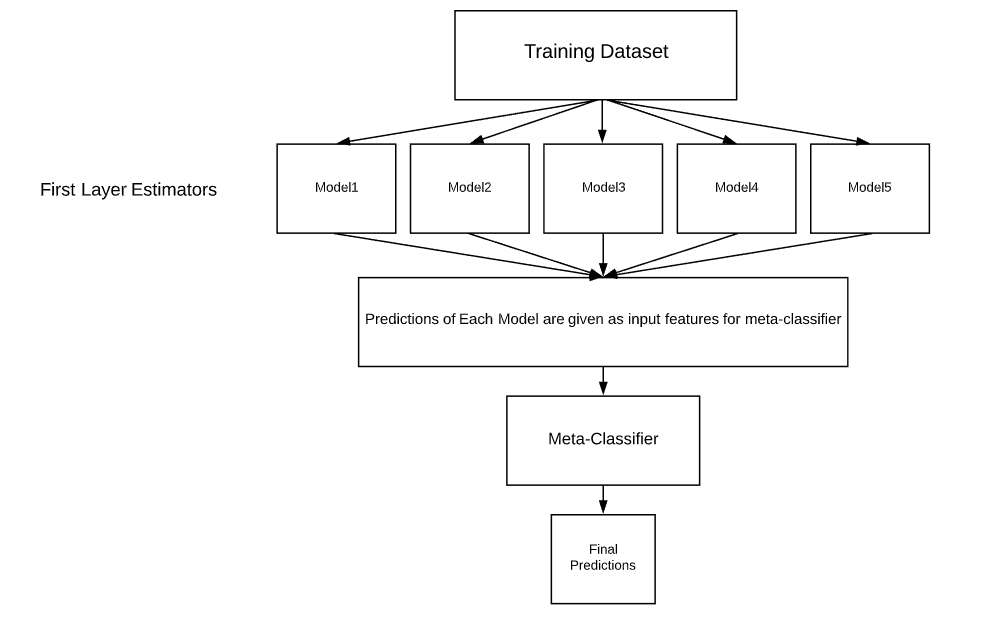

The train set is split into training and validation sets.

We train the base models on the training set.

We make predictions only on the validation set and the test set.

The validation predictions are used as features to build a new model.

This model is used to make final predictions on the test set using the prediction values as features.

In [ ]:
base_models = [
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    MLPClassifier(random_state=42)
]

meta_model = LogisticRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
train_meta_features = np.zeros((X_train.shape[0], len(base_models)))
test_meta_features = np.zeros((X_test.shape[0], len(base_models)))

In [ ]:
kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
for i, model in enumerate(base_models):
    for train_idx, val_idx in kfold.split(X_train, y_train):
        cloned_model = clone(model)  # Clone the model to avoid overwriting
        cloned_model.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
        train_meta_features[val_idx, i] = cloned_model.predict(X_train.iloc[val_idx])

    model.fit(X_train, y_train)  # Train on full train set
    test_meta_features[:, i] = model.predict(X_test)

In [ ]:
meta_model.fit(train_meta_features, y_train)

LogisticRegression()

In [ ]:
stacked_predictions = meta_model.predict(test_meta_features)

In [ ]:
# List to store accuracies
accuracies = []

# Evaluate base models
for i, model in enumerate(base_models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Base Model {i+1} Accuracy:", accuracy)
    accuracies.append(accuracy)

# Evaluate stacked model
print("Stacked Model Accuracy:", accuracy_score(y_test, stacked_predictions))

Base Model 1 Accuracy: 0.9853658536585366
Base Model 2 Accuracy: 0.9317073170731708
Base Model 3 Accuracy: 0.751219512195122
Stacked Model Accuracy: 0.9853658536585366


In [ ]:
accuracy = accuracy_score(y_test, stacked_predictions)
print("Stacked Model Accuracy:", accuracy)

Stacked Model Accuracy: 0.9853658536585366


In [ ]:
input_data = (70,1,3,145,233,1,0,150,0,2.3,1,0,1)

# Fit the bagging classifier
meta_model.fit(x, y)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

print(input_data_reshaped)

prediction = meta_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[[ 70.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   1.    0.
    1. ]]
[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## RANDOM FOREST TECHNIQUE

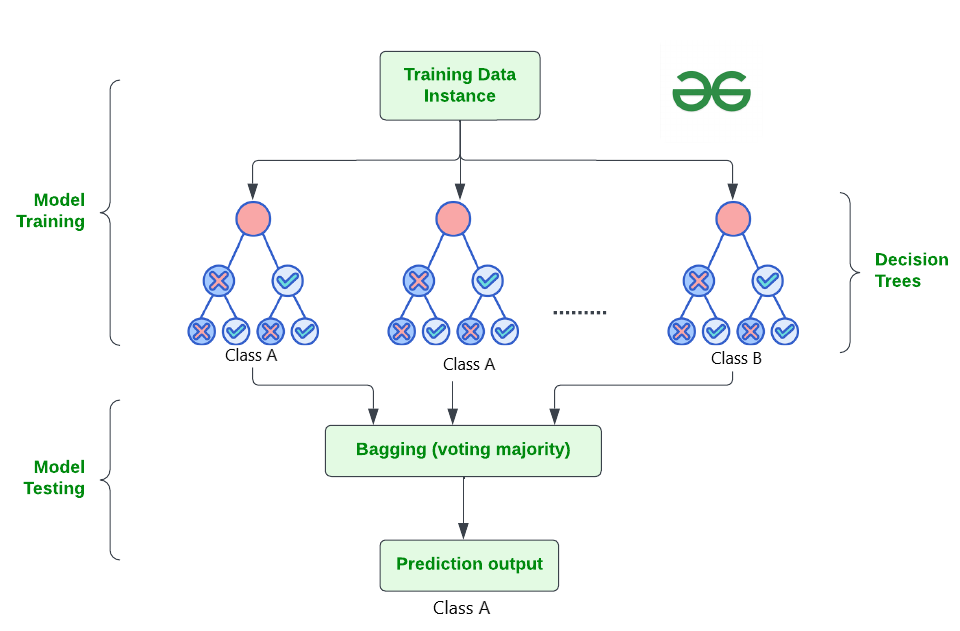

Random Forest algorithm is a powerful tree learning technique in Machine Learning. It works by creating a number of Decision Trees during the training phase.

Each tree is constructed using a random subset of the data set to measure a random subset of features in each partition.

 This randomness introduces variability among individual trees, reducing the risk of overfitting and improving overall prediction performance. In prediction, the algorithm aggregates the results of all trees, either by voting (for classification tasks) or by averaging (for regression tasks) This collaborative decision-making process, supported by multiple trees with their insights, provides an example stable and precise results.

 Random forests are widely used for classification and regression functions, which are known for their ability to handle complex data, reduce overfitting, and provide reliable forecasts in different environments.



In [ ]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

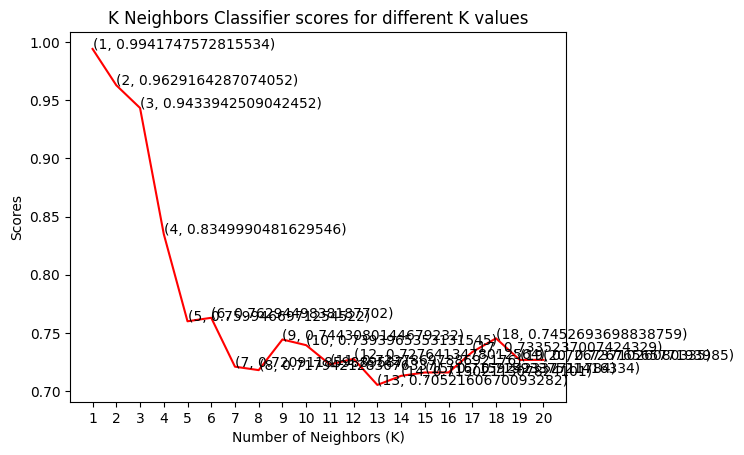

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,x,y,cv=10)

In [ ]:
score

array([0.74757282, 0.72815534, 0.72815534, 0.74757282, 0.85436893,
       0.73529412, 0.66666667, 0.71568627, 0.66666667, 0.68627451])

In [ ]:
score.mean()

0.7276413478012564

In [ ]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,x,y,cv=10)

In [ ]:
score.mean()

0.9970588235294118

In [ ]:
score

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.97058824, 1.        ])

In [ ]:
grandientbostingclassifier = GradientBoostingClassifier(n_estimators=10)

score=cross_val_score(grandientbostingclassifier,x,y,cv=10)

In [ ]:
score

array([0.84466019, 0.95145631, 0.91262136, 0.84466019, 0.86407767,
       0.91176471, 0.84313725, 0.88235294, 0.82352941, 0.82352941])

In [ ]:
score.mean()

0.8701789453645535

In [ ]:
input_data = (70,1,3,145,233,1,0,150,0,2.3,1,0,1)

# Fit the bagging classifier
model.fit(x, y)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

print(input_data_reshaped)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[[ 70.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   1.    0.
    1. ]]
[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
